In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 3.0, 3.0, 0.0],
  [1.0, 7.0, 7.0, 3.0],
  [0.0, 8.0, 8.0, 7.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C2', 'C2']}

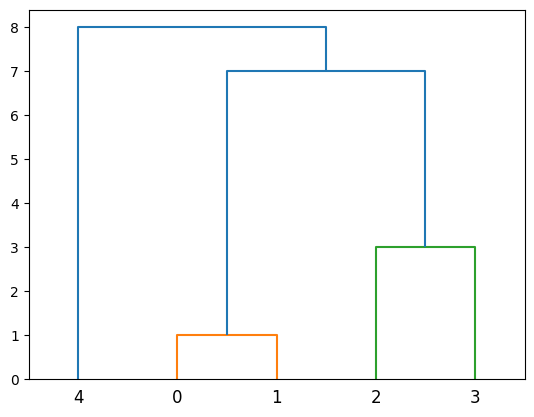

In [36]:
X = [1, 2 ,9, 12, 20]

X = np.array(X).reshape(-1, 1)
# apply ahc to X using single linkage
Z = linkage(X, 'single')
dendrogram(Z)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 3.0, 3.0, 0.0],
  [1.0, 11.0, 11.0, 3.0],
  [0.0, 19.0, 19.0, 11.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['C1', 'C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1', 'C1']}

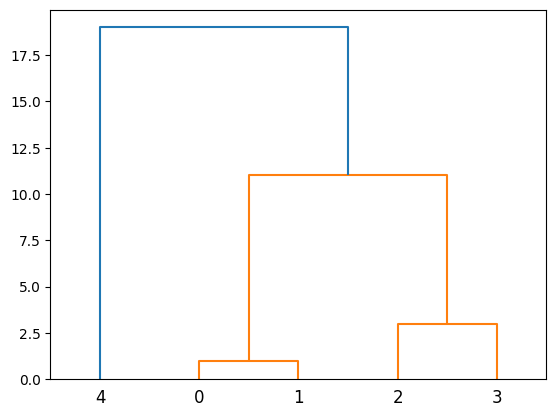

In [37]:
#  apply ahc to X using single linkage
Z = linkage(X, 'complete')
dendrogram(Z)

In [38]:
data = pd.read_csv("./iris/iris.data")
feature_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = [*feature_column, "class"]
sample =data

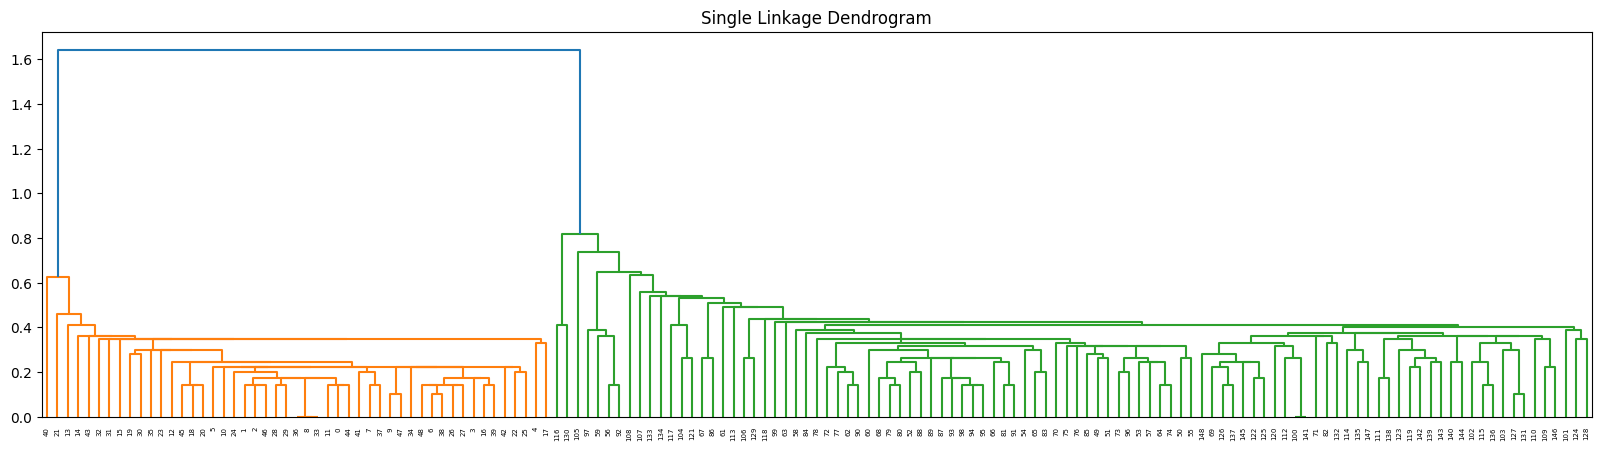

In [39]:
single_linkage = linkage(data[feature_column], method='single')
plt.figure(figsize=(20, 5))
dendrogram(single_linkage)
plt.title('Single Linkage Dendrogram')
plt.show()

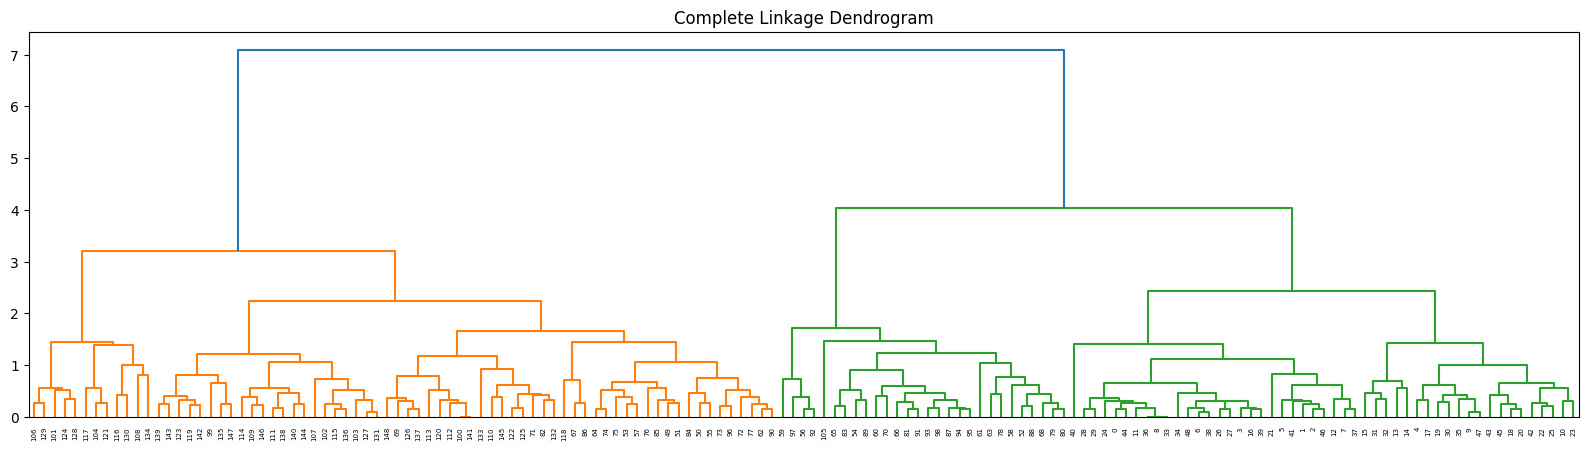

In [40]:
complete_linkage = linkage(data[feature_column], method='complete')
plt.figure(figsize=(20, 5))
dendrogram(complete_linkage)
plt.title('Complete Linkage Dendrogram')
plt.show()

In [41]:
george_data = pd.read_csv("george.data", header=None)
george_data = np.array([list(map(float, line.split())) for line in george_data[0]])

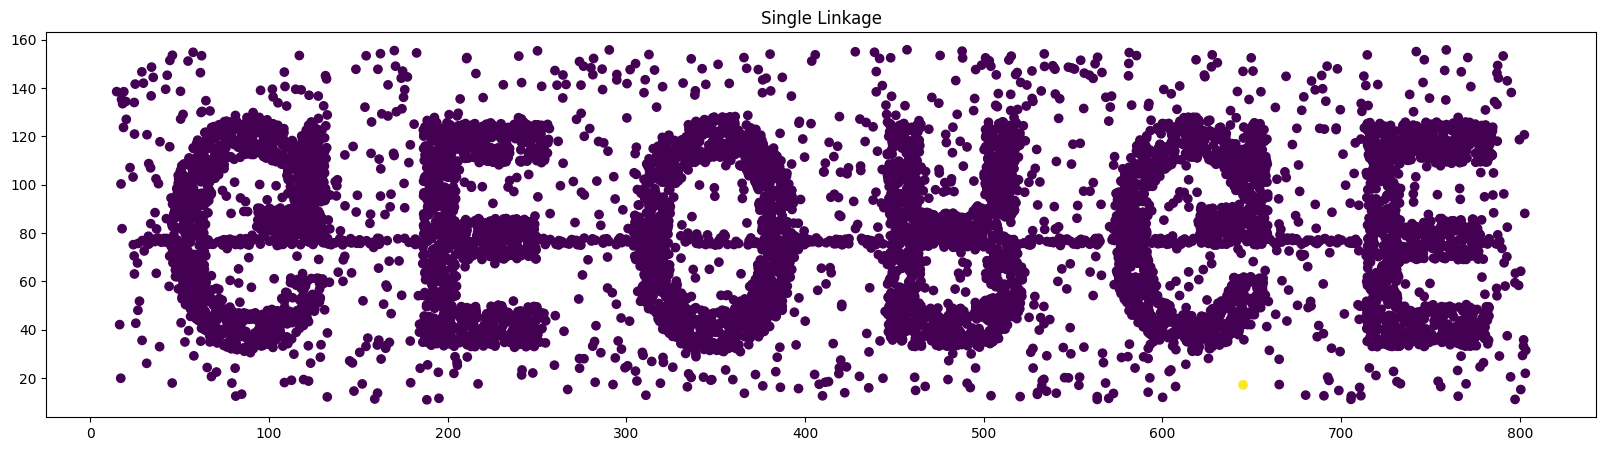

In [42]:
single_linkage = AgglomerativeClustering(n_clusters=2, linkage='single')
single_linkage.fit(george_data)
plt.figure(figsize=(20, 5))
plt.scatter(george_data[:, 0], george_data[:, 1], c=single_linkage.labels_)
plt.title('Single Linkage')
plt.show()

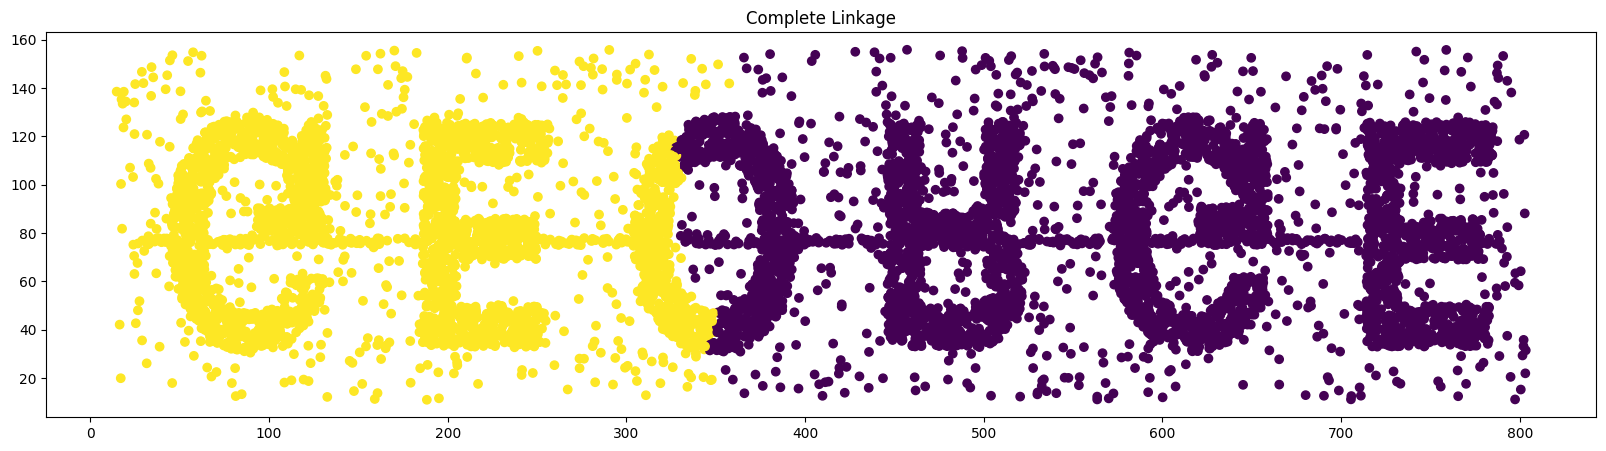

In [43]:
complete_linkage = AgglomerativeClustering(n_clusters=2, linkage='complete')
complete_linkage.fit(george_data)
plt.figure(figsize=(20, 5))
plt.scatter(george_data[:, 0], george_data[:, 1], c=complete_linkage.labels_, cmap='viridis')
plt.title('Complete Linkage')
plt.show()

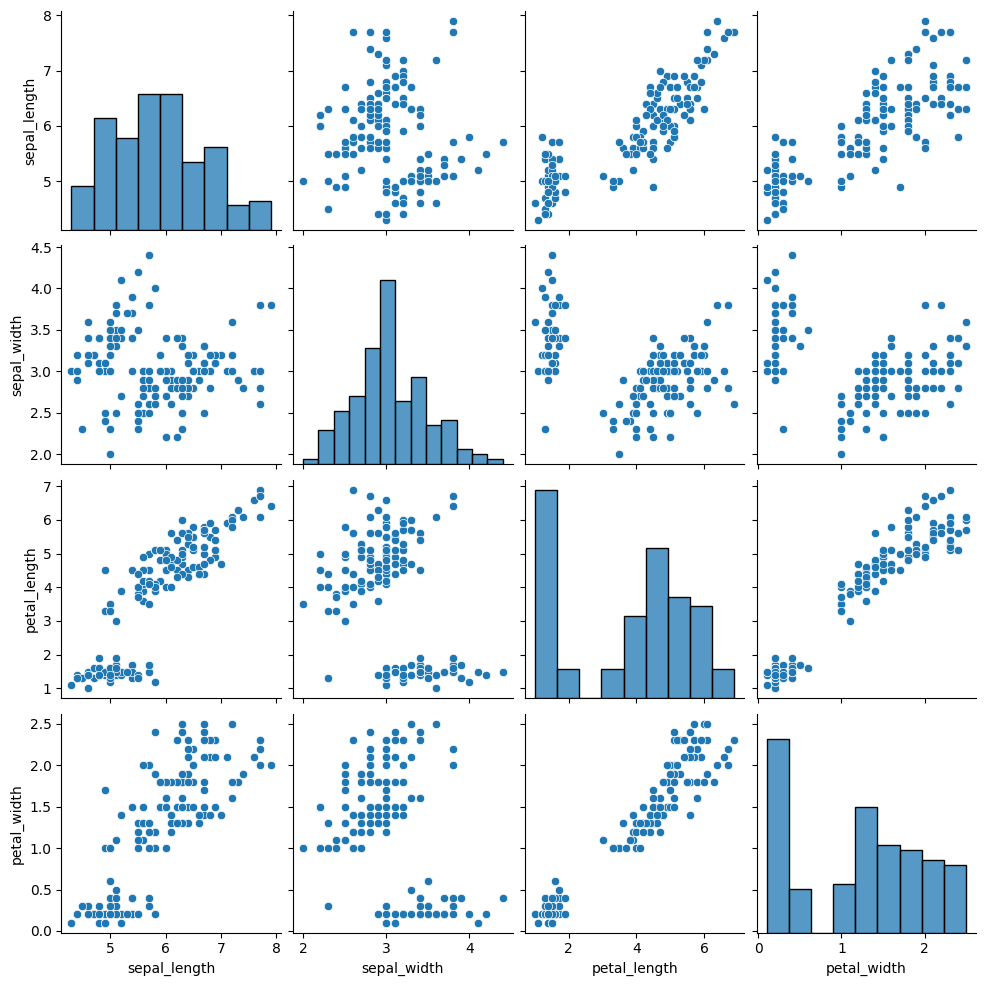

In [44]:
data = data[feature_column]
sns.pairplot(data)

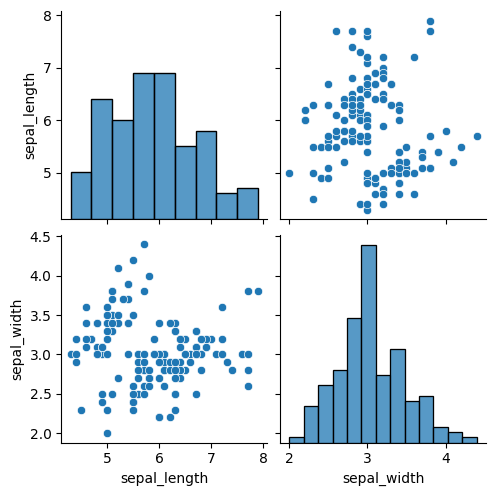

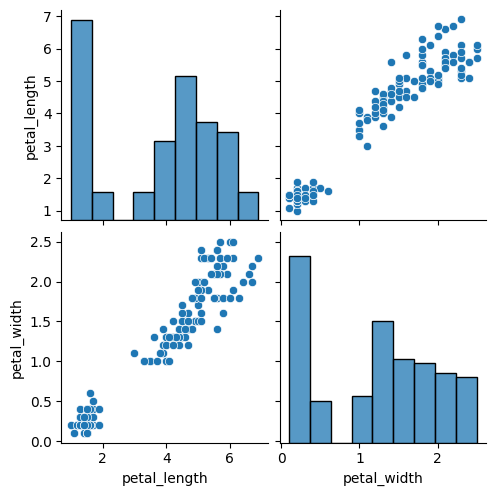

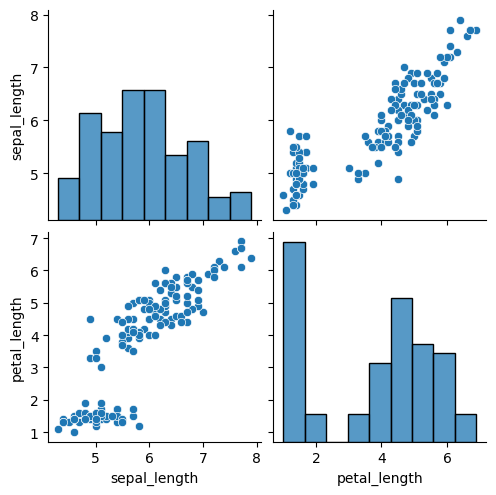

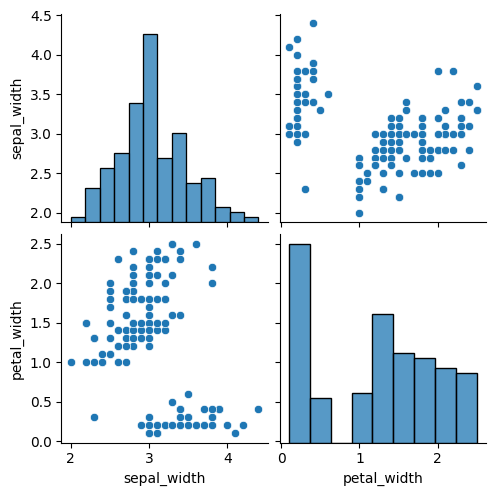

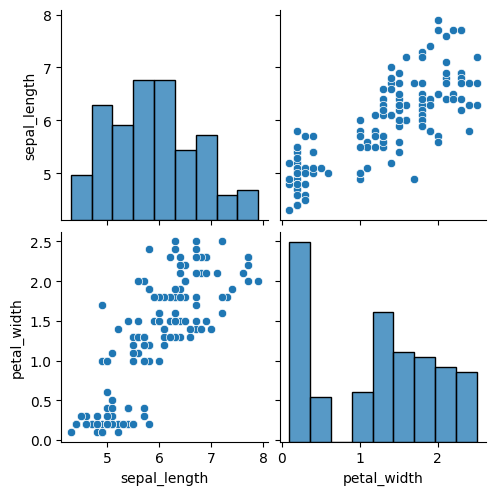

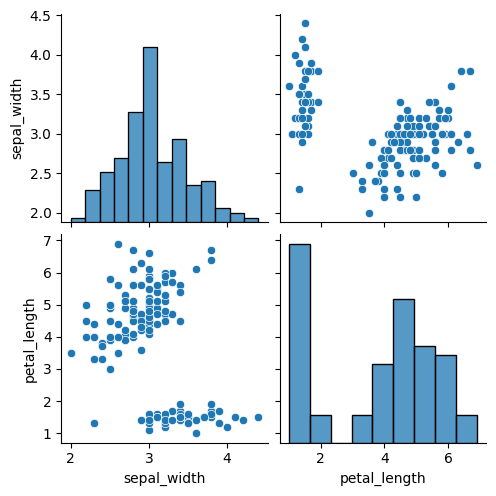

In [45]:
iris_data_1 = data[['sepal_length', 'sepal_width']]
iris_data_2 = data[['petal_length', 'petal_width']]
iris_data_3 = data[['sepal_length', 'petal_length']]
iris_data_4 = data[['sepal_width', 'petal_width']]
iris_data_5 = data[['sepal_length', 'petal_width']]
iris_data_6 = data[['sepal_width', 'petal_length']]
sns.pairplot(iris_data_1)
sns.pairplot(iris_data_2)
sns.pairplot(iris_data_3)
sns.pairplot(iris_data_4)
sns.pairplot(iris_data_5)
sns.pairplot(iris_data_6)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


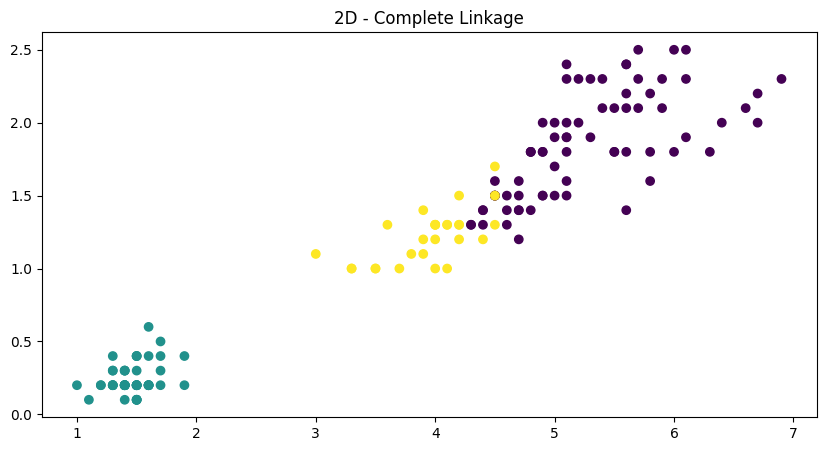

In [46]:
groups = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
groups.fit(data)
plt.figure(figsize=(10, 5))
plt.scatter(iris_data_2['petal_length'], iris_data_2['petal_width'], c=groups.labels_, cmap='viridis')
plt.title('2D - Complete Linkage')
plt.show()

In [47]:
class PCA:
  def __init__(self, data: pd.DataFrame, classes = pd.Series) -> None:
    self.__data = data
    self.__classes = classes  
    self.__eigval: np.ndarray = None
    self.__eigvec: np.ndarray = None
    self.__x_adj: pd.DataFrame = None
    self.__cov_adj: pd.DataFrame = None
    self.__sort_idx: np.ndarray = None
    self.__cal_pca()

  def __cal_pca(self):
    self.__x_adj = (self.__data - self.__data.mean()) 
    self.__cov_adj = self.__x_adj.cov()
    self.__eigval, self.__eigvec = np.linalg.eig(self.__cov_adj)
    self.__sort_idx = np.argsort(self.__eigval)[::-1]
    self.__eigvec = self.__eigvec.T

  def eigvec(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigvec
    
    return self.__eigvec[self.__sort_idx[:n]]
  
  def eigval(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigval

    return self.__eigval[self.__sort_idx[:n]]
  
  def project(self, n: int) -> pd.DataFrame:
    max_eigvec = self.eigvec(n)
    new_x = max_eigvec.dot(self.__x_adj.T).T
    new_x = pd.DataFrame(new_x)
    new_x.columns = [f"PC{i+1}" for i in range(n)]
    new_x["class"] = self.__classes
    return new_x
  
  def per_var_of(self, n: int) -> float:
    return self.eigval(n).sum() / self.eigval().sum()
  
  def eig_var(self) -> list[float]:
    sum_val = self.__eigval.sum()
    return [ e / sum_val for e in self.__eigval]

In [48]:
def add_class(data: pd.DataFrame, classes: pd.Series) -> pd.DataFrame:
  with_class = data.copy()
  with_class["class"] = classes
  return with_class

In [49]:
def plot_pca(data: pd.DataFrame, axises: list[str], labels=list, pointsize: int = 0.7, viewbox: list = None) -> None:
  p = None
  if len(axises) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    if viewbox:
      ax.view_init(elev=viewbox[0], azim=viewbox[1], roll=viewbox[2])
    for l in labels:
      sc = data[data["class"] == l]
      ax.scatter3D(*[sc[axis] for axis in axises], s=pointsize,)
      ax.set_xlabel(axises[0])
      ax.set_ylabel(axises[1])
      ax.set_zlabel(axises[2])
  else:
    for l in labels:
      sc = data[data["class"] == l]
      plt.scatter(*[sc[axis] for axis in axises], s=pointsize,)
    plt.xlabel(axises[0])
    plt.ylabel(axises[1])
  plt.legend(labels)
  plt.show()

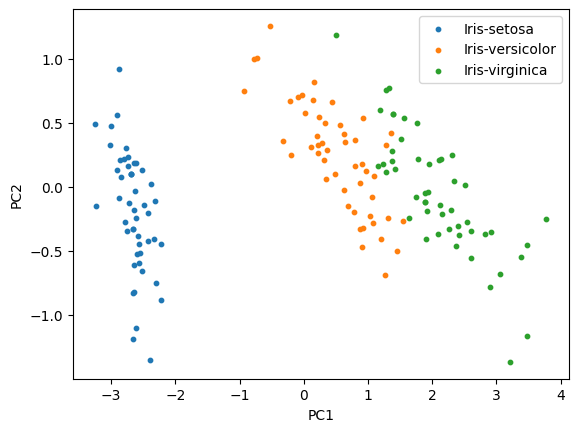

In [50]:
data = pd.read_csv("./iris/iris.data")
feature_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = [*feature_column, "class"]
feature_data = data[feature_column]
pca = PCA(feature_data, data["class"])
plot_pca(pca.project(2), ["PC1","PC2"], data["class"].unique(), pointsize=10)

In [51]:
kmeans_pca = KMeans(n_clusters=3, algorithm='elkan')
pca = pca.project(2).drop(columns=["class"])
y = kmeans_pca.fit(pca)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


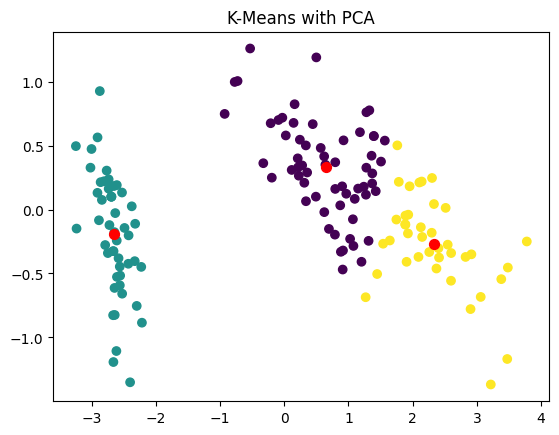

In [52]:
plt.scatter(pca["PC1"], pca["PC2"], c=y.labels_, cmap='viridis')
plt.title('K-Means with PCA')

# plot the centroids
plt.scatter(y.cluster_centers_[:, 0], y.cluster_centers_[:,1], c='red', s=50)
plt.show()

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


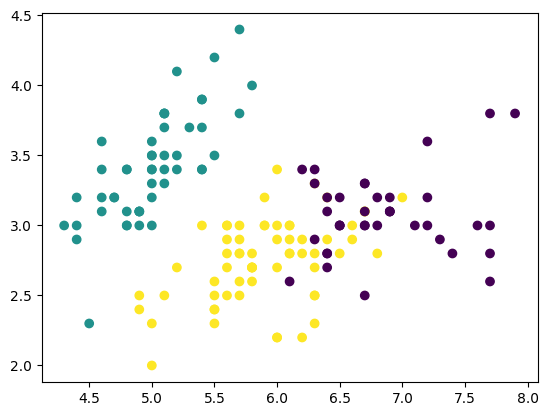

In [53]:
data = pd.read_csv("./iris/iris.data")
feature_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = [*feature_column, "class"]
feature_data = data[feature_column]

# kmeans with 3 clusters and then PCA
kmeans = KMeans(n_clusters=3, algorithm='elkan')
y = kmeans.fit(feature_data)
plt.scatter(feature_data["sepal_length"], feature_data["sepal_width"], c=y.labels_, cmap='viridis')


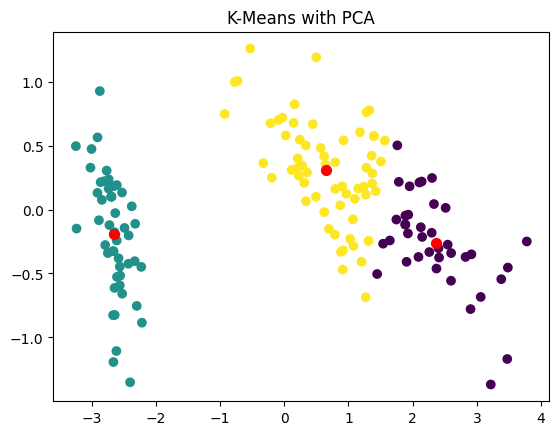

In [61]:
# pca the y
pca = PCA(feature_data, y.labels_)
pca_data = pca.project(2)
plt.scatter(pca_data["PC1"], pca_data["PC2"], c=pca_data["class"], cmap='viridis')
plt.title('K-Means with PCA')

# plot the centroids 
plt.scatter(pca_data.groupby("class").mean()["PC1"], pca_data.groupby("class").mean()["PC2"], c='red', s=50)
plt.show()

In [55]:
import sklearn.metrics as metrics

print("Silhouette Coefficient: %0.5f"% metrics.silhouette_score(pca_data.drop(columns=["class"]), y.labels_))

Silhouette Coefficient: 0.59657
